In [17]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [18]:
# 2. Đọc file csv
company_csv = 'ADS.DE.csv'
data = pd.read_csv(company_csv)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,167.149994,167.699997,165.250000,167.149994,154.246078,587067.0
1,2018-01-03,167.600006,168.050003,166.050003,168.050003,155.076584,662050.0
2,2018-01-04,169.149994,171.699997,168.500000,170.250000,157.106735,806719.0
3,2018-01-05,171.699997,172.649994,171.000000,172.050003,158.767776,693116.0
4,2018-01-08,174.100006,174.149994,172.399994,172.750000,159.413742,805948.0
...,...,...,...,...,...,...,...
1478,2023-10-25,170.600006,172.240005,169.100006,171.500000,171.500000,430288.0
1479,2023-10-26,167.440002,169.119995,165.699997,166.460007,166.460007,511175.0
1480,2023-10-27,166.339996,167.419998,163.559998,166.300003,166.300003,393507.0
1481,2023-10-30,166.979996,167.880005,165.880005,166.440002,166.440002,271503.0


In [19]:
#3. Chọn các cột cần thiết
df = pd.read_csv(company_csv)
df = df[['Date','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [20]:
#4. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [21]:
#Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm số k phù hợp
best_k = None
best_rmse = float('inf')

for k in range(1, 21):
    #5. Xây dựng mô hình KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)

    # Dự đoán giá trị cho tập xác thực
    x_val = np.array(val_data.index).reshape(-1, 1)
    y_val = np.array(val_data['Close'])
    y_pred_val = model.predict(x_val)

    # Tính toán RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    # In số k và RMSE
    print(f"Number of neighbors: {k}, RMSE: {rmse}")

    # Lưu lại số k và RMSE tốt nhất
    if rmse < best_rmse:
        best_k = k
        best_rmse = rmse

#6. Xây dựng mô hình KNN với số láng giềng tốt nhất
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(x_train, y_train)

# Dự đoán giá trị cho tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# In số k và RMSE tốt nhất
print('Best k:', best_k)
print('Best RMSE:', best_rmse)

Number of neighbors: 1, RMSE: 26.199996999999996
Number of neighbors: 2, RMSE: 26.139999499999988
Number of neighbors: 3, RMSE: 25.726664333333332
Number of neighbors: 4, RMSE: 25.844997499999977
Number of neighbors: 5, RMSE: 25.595996199999973
Number of neighbors: 6, RMSE: 25.586662333333322
Number of neighbors: 7, RMSE: 25.668568285714287
Number of neighbors: 8, RMSE: 25.617496625
Number of neighbors: 9, RMSE: 25.66444066666665
Number of neighbors: 10, RMSE: 25.021995599999997
Number of neighbors: 11, RMSE: 24.681814090909086
Number of neighbors: 12, RMSE: 24.08999641666665
Number of neighbors: 13, RMSE: 23.41691946153844
Number of neighbors: 14, RMSE: 23.15142499999999
Number of neighbors: 15, RMSE: 23.12532966666666
Number of neighbors: 16, RMSE: 22.96874624999998
Number of neighbors: 17, RMSE: 22.86470217647056
Number of neighbors: 18, RMSE: 22.93888522222221
Number of neighbors: 19, RMSE: 23.117891052631563
Number of neighbors: 20, RMSE: 23.23899614999999
Best k: 17
Best RMSE: 22

In [22]:
#7. Tính MAE, RMSE, MSE, R-square cho testing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
mse = mean_squared_error(y_test, y_pred)
# Tính MAE, RMSE, R-square cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mse_test = calculate_mse(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Tính MAE, RMSE,MSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mse_val = calculate_mse(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)
# In kết quả
print('---------VALIDATE----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print("MSE:", round(mse_val, 3))
print("R-squared:", round(r_squared_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSE:", round(mse_test, 3))
print("R-squared:", round(r_squared_test, 3))
print('-------------------')

---------VALIDATE----------
MAE: 23.239
RMSE: 23.239
MSE: 540.051
R-squared: nan
--------------------------
---------TEST----------
MAE: 25.011
RMSE: 26.57
MSE: 705.973
R-squared: -7.55
-------------------


C:\Users\trant\New folder\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [23]:
#8. Dự đoán giá trị cho 30 ngày tiếp theo
last_index = df.index[-1]
last_data = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print(y_next_30_days)

[144.33529482 144.33529482 144.33529482 144.33529482 144.33529482
 144.33529482 144.33529482 144.33529482 144.33529482 144.33529482
 144.33529482 144.33529482 144.33529482 144.33529482 144.33529482
 144.33529482 144.33529482 144.33529482 144.33529482 144.33529482
 144.33529482 144.33529482 144.33529482 144.33529482 144.33529482
 144.33529482 144.33529482 144.33529482 144.33529482 144.33529482]


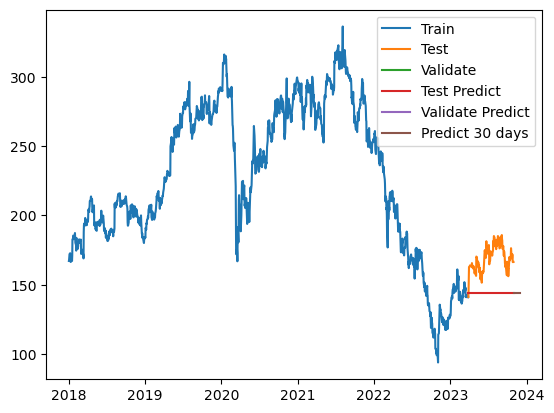

In [24]:
#9. Vẽ đồ thị
fig, ax = plt.subplots()
ax.plot(train_data['Date'], train_data['Close'])
ax.plot(test_data['Date'], test_data['Close'])
ax.plot(val_data['Date'], val_data['Close'])
ax.plot(test_data['Date'], y_pred)
ax.plot(val_data['Date'], y_pred_val)
ax.plot(last_data,y_next_30_days)
ax.legend(['Train', 'Test', 'Validate', 'Test Predict', 'Validate Predict','Predict 30 days'])